In [1]:
import pandas as pd

In [2]:
df_corpus_no_zalo = pd.read_csv("data_corpus_full/final_df_no_zalo.csv")
df_corpus_no_zalo

,url,description,lawName,expDate,isExpire,content,is_content,lawNameRemoveText,is_law_id_error,is_zalo,Unnamed: 0
0,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,Hiệu lực:01/01/2014,NaN,HIẾN PHÁP\nNƯỚC CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT...,True,hpks0,False,False,NaN
1,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hình sự,Bộ luật 100/2015/QH13,Hiệu lực:01/01/2018,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nHÌNH SỰ\n__\nCăn cứ Hiến pháp nước Cộ...,True,100/2015/qh13,False,False,NaN
2,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Tố tụng dân sự,Bộ luật 92/2015/QH13,Hiệu lực:01/07/2016,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nTỐ TỤNG DÂN SỰ\n________\nCăn cứ Hiến...,True,92/2015/qh13,False,False,NaN
3,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hàng hải,Bộ luật 95/2015/QH13,Hiệu lực:01/07/2017,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nHÀNG HẢI VIỆT NAM\n_________\nCăn cứ ...,True,95/2015/qh13,False,False,NaN
4,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Lao động,Bộ luật 10/2012/QH13,Hiệu lực:01/05/2013,Trạng thái:Hết hiệu lực toàn bộ,BỘ LUẬT LAO ĐỘNG\nCăn cứ Hiến pháp nước Cộng h...,True,10/2012/qh13,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56036,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Đính chính văn bản (Thông tư số 121/2020/TT-BQP),Công văn 4197/BQP-PC,Hiệu lực:10/11/2020,NaN,ỦY BAN NHÂN DÂN\nTỈNH KON TUM\n-------\nCỘNG H...,True,4197/bqp-pc,False,False,1409.0
56037,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Việc hướng dẫn thực hiện các quy định của Nghị...,Công văn 3275/BTTTT-ƯDCNTT,Hiệu lực:28/10/2011,NaN,ỦY BAN NHÂN DÂN\nTỈNH THỪA THIÊN HUẾ\n-------\...,True,3275/btttt-ưdcntt,False,False,1410.0
56038,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,"V/v Hướng dẫn xác định chi phí phát triển, nân...",Công văn 2589/BTTTT-ƯDCNTT,Hiệu lực:24/08/2011,NaN,BỘ TÀI CHÍNH\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGH...,True,2589/btttt-ưdcntt,False,False,1411.0
56039,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Công văn về việc thuế nhập khẩu vật tư thiết b...,Công văn 10547/TC/TCT,Hiệu lực:...,NaN,BỘ NÔNG NGHIỆP VÀ PHÁT TRIỂN NÔNG THÔN\n------...,True,10547/tc/tct,False,False,1412.0


In [3]:
# utilities function
import seaborn as sns

def plot_value_count(series):
    type_counts = series.value_counts()
    print(type_counts)
    type_counts.plot(kind='bar')

In [37]:
import re
def process_structure_law(text):
    # handle article
    # regex = r"^(Điều \d+\D+\n)"
    regex = r"(^Điều[^\n]+)|(^Điều[^\n]+)"
    address_receive_pos = re.search(r"^(Nơi nhận:\n)", text, re.MULTILINE)
    matches = re.finditer(regex, text, re.MULTILINE)
    articles_pos = []
    articles = []    
    for matchNum, match in enumerate(matches, start=1):
        articles_pos.append((match.start(), match.end()))

    if articles_pos == []:
        return []
    for i in range(0, len(articles_pos)-1):
        articles.append(text[articles_pos[int(i)][0]:articles_pos[int(i)+1][0]])
    
    # handle end of file
    final_pos = len(text)-1
    try:
        if int(address_receive_pos.start()) > articles_pos[-1][1]:
            final_pos = address_receive_pos.start()
    except:
        pass
    articles.append(text[articles_pos[-1][0]:final_pos ])
    return articles

def split_law_to_any_id(text):
    regex = r"(^Điều[^\n]+)|(^Điều[^\n]+)"
    address_receive_pos = re.search(r"^(Nơi nhận:\n)", text, re.MULTILINE)
    matches = re.finditer(regex, text, re.MULTILINE)
    articles_pos = []
    articles = []    
    for matchNum, match in enumerate(matches, start=1):
        articles_pos.append((match.start(), match.end()))

    if articles_pos == []:
        return []
    print(articles_pos)
    for i in range(0, len(articles_pos)-1):
        text_at_article_pos = text[articles_pos[int(i)][0]:articles_pos[int(i)][1]]
        article_id = text_at_article_pos.strip().split(' ')[1].strip().strip('.').strip(':').strip(',').strip('`').strip('\n')
        article_name = text_at_article_pos.strip()
        article_content = text[articles_pos[int(i)][1]:articles_pos[int(i)+1][0]].strip()
        articles.append((article_id, article_name, article_content))
    
    # handle end of file
    final_pos = len(text)-1
    try:
        if int(address_receive_pos.start()) > articles_pos[-1][1]:
            final_pos = address_receive_pos.start()
    except:
        pass
    text_at_article_pos_final = text[articles_pos[-1][0]:articles_pos[-1][1]]
    article_id_final = text_at_article_pos_final.strip().split(' ')[1].strip().strip('.').strip(':').strip(',').strip('`').strip('\n')
    article_name_final = text_at_article_pos_final.strip()
    article_content_final = text[articles_pos[-1][1]:final_pos].strip()
    articles.append((article_id_final, article_name_final, article_content_final))
    return articles
    


structed = split_law_to_any_id(df_corpus_no_zalo.iloc[371]['content'])
print(len(structed))
structed


[(444, 449), (679, 684), (1358, 1363), (2620, 2625), (2785, 2790), (2887, 2892), (3005, 3010), (3246, 3251), (3304, 3309), (3978, 3984), (4946, 4952), (5108, 5114), (5814, 5820), (6193, 6199), (6643, 6649), (6742, 6748), (6864, 6870), (7196, 7202), (7722, 7728), (8163, 8169), (8534, 8540), (9910, 9916), (10474, 10480), (10728, 10734), (11498, 11504), (11740, 11746), (12593, 12599), (12867, 12873), (13095, 13101), (13536, 13542), (13796, 13802), (14180, 14186), (14652, 14658)]


IndexError: list index out of range

is_split_possible
True     45180
False    10861
Name: count, dtype: int64


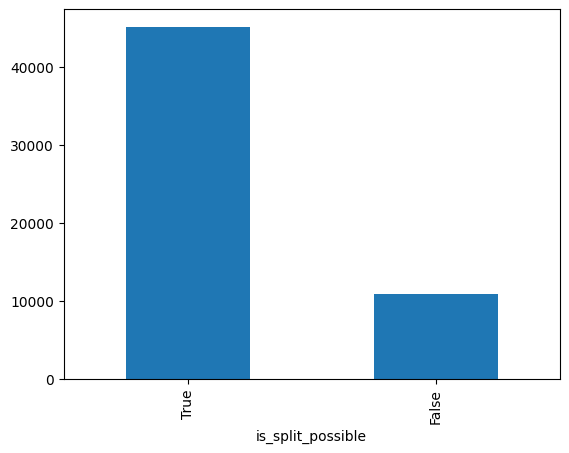

In [5]:
# We check if split is possible
def is_split_possible(text):
    if process_structure_law(text) == []:
        return False
    return True

df_corpus_no_zalo['is_split_possible'] = df_corpus_no_zalo['content'].apply(is_split_possible)

plot_value_count(df_corpus_no_zalo['is_split_possible'])

There are 45k document that can split, but we still got 10k that cannot, we will handle this by chunking text

In [19]:
# handle doc that cannot split

from langchain.text_splitter import RecursiveCharacterTextSplitter

def chunking_not_split_text(text):
    custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 650,
    chunk_overlap  = 100,
    # Use length of the text as the size measure
    length_function = len,
    )
    texts = custom_text_splitter.create_documents([text])
    return texts
    
chunking_not_split_text(df_corpus_no_zalo.iloc[1000]['content'])

[Document(page_content='NGHỊ QUYẾT\nVề những giải pháp chủ yếu chỉ đạo điều hành thực hiện kế hoạch phát triển\nKinh tế - Xã hội và dự toán ngân sách nhà nước năm 2012\n_______________________________', metadata={}),
 Document(page_content='Năm 2011, mặc dù gặp nhiều khó khăn, thách thức nhưng dưới sự lãnh đạo của Đảng, sự chỉ đạo điều hành quyết liệt của Chính phủ, nỗ lực của các ngành, các cấp, cộng đồng doanh nghiệp và nhân dân, nền kinh tế nước ta đã có chuyển biến tích cực và đạt được những kết quả trong việc kiềm chế lạm phát, ổn định kinh tế vĩ mô, bảo đảm an sinh xã hội: Tốc độ tăng trưởng kinh tế năm 2011 đạt khoảng 6%; nông nghiệp phát triển ổn định, sản lượng lương thực đạt mức cao nhất từ trước đến nay; sản xuất công nghiệp đạt tốc độ tăng trưởng khá; khu vực dịch vụ, du lịch tiếp tục đà phát triển. Xuất khẩu tăng gấp hơn 3 lần so với chỉ tiêu kế hoạch đề ra; nhập', metadata={}),
 Document(page_content='du lịch tiếp tục đà phát triển. Xuất khẩu tăng gấp hơn 3 lần so với chỉ

That look good, let's handle the final data

In [24]:
# We create new dataframe and standardlize column name, then we can work
df_splited_corpus = pd.DataFrame(columns=['url', 'description', 'law_name', 'law_id', 'article_id', 
                                          'article_name', 'article_content', 'expDate', 'isExpire', 'is_zalo'])

In [35]:
for i in range(0, len(df_corpus_no_zalo)):
    # temp_series = pd.Series(index=df_splited_corpus.columns)
    print(i)
    if df_corpus_no_zalo.at[i, 'is_split_possible']:
        # I use .at because it faster
        list_article = split_law_to_any_id(df_corpus_no_zalo.at[i, 'content'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: list index out of range